<a href="https://colab.research.google.com/github/Poojith23/ISRO-DATA-ANALYSIS-PYTHON-PROJECT/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

df = pd.read_csv("launchers.csv")

In [4]:
# Display the first few rows of the dataset
print(df.head())

# Get summary statistics of the dataset
print(df.describe())

# Check the data types of each column
print(df.dtypes)

# Check the number of rows and columns in the dataset
print(df.shape)

   SN                     Name Launch Date Launcher Type  \
0   1  PSLV-C45/EMISAT MISSION  2019-04-01       PSLV-QL   
1   2        PSLV-C24/IRNSS-1B  2014-04-04       PSLV-XL   
2   3        PSLV-C41/IRNSS-1I  2018-04-12       PSLV-XL   
3   4         GSLV-D3 / GSAT-4  2010-04-15    GSLV-MK-II   
4   5                    SLV-3  1983-04-17           NaN   

                  Payload               Remarks  
0                  EMISAT                   NaN  
1                IRNSS-1B                   NaN  
2                IRNSS-1I                   NaN  
3                  GSAT-4  Mission Unsuccessful  
4  Rohini Satellite RS-D2                   NaN  
              SN
count  77.000000
mean   39.000000
std    22.371857
min     1.000000
25%    20.000000
50%    39.000000
75%    58.000000
max    77.000000
SN                int64
Name             object
Launch Date      object
Launcher Type    object
Payload          object
Remarks          object
dtype: object
(77, 6)


In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Remove duplicate records
df = df.drop_duplicates()

# Convert date columns to datetime format
df['Launch Date'] = pd.to_datetime(df['Launch Date'])

SN                0
Name              0
Launch Date       0
Launcher Type    10
Payload          10
Remarks          69
dtype: int64


In [6]:
# Filter rows based on a specific condition
filtered_df = df[df['Launcher Type'] == 'PSLV-XL']

# Filter rows based on multiple conditions
filtered_df = df[(df['Launcher Type'] == 'PSLV-XL') & (df['Remarks'].str.contains('Mission Unsuccessful'))]

In [7]:
# Group data by Launcher Type and calculate the count of missions
grouped_df = df.groupby('Launcher Type').size()

# Group data by Launcher Type and Payload, and calculate the average launch date
grouped_df = df.groupby(['Launcher Type', 'Payload'])['Launch Date'].mean()

In [8]:
# Sort the data by Launch Date in ascending order
sorted_df = df.sort_values('Launch Date')

# Sort the data by Launch Date in descending order
sorted_df = df.sort_values('Launch Date', ascending=False)

In [19]:
# Convert 'Launch Date' column to datetime
df['Launch Date'] = pd.to_datetime(df['Launch Date'])

# Convert dates to timestamps
timestamps = df['Launch Date'].astype(int) // 10**9  # Convert nanoseconds to seconds

# Calculate the variance of timestamps
variance_date = pd.Series(timestamps).var()

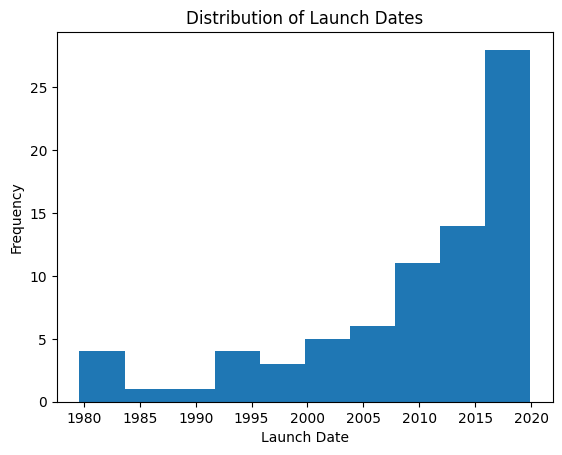

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of Launch Dates
plt.hist(df['Launch Date'], bins=10)
plt.xlabel('Launch Date')
plt.ylabel('Frequency')
plt.title('Distribution of Launch Dates')
plt.show()



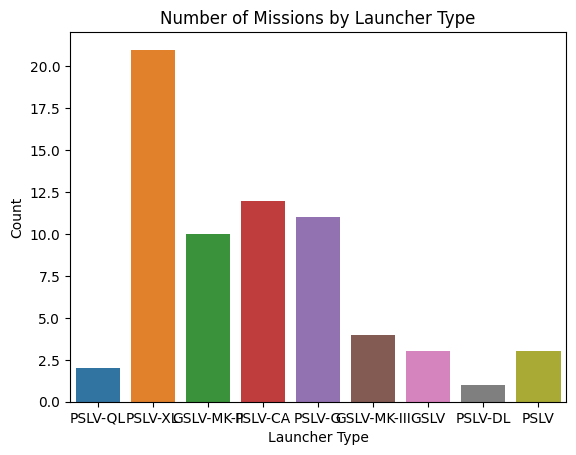

In [22]:
# Create a bar plot of Launcher Types
sns.countplot(data=df, x='Launcher Type')
plt.xlabel('Launcher Type')
plt.ylabel('Count')
plt.title('Number of Missions by Launcher Type')
plt.show()

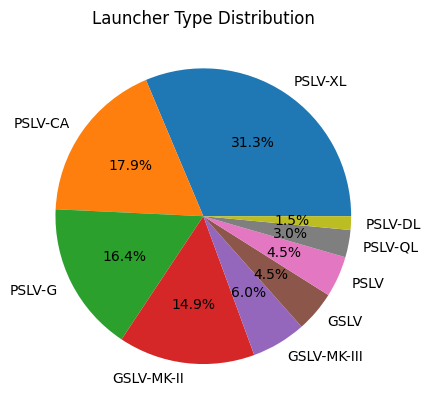

In [23]:
launcher_counts = df['Launcher Type'].value_counts()
plt.pie(launcher_counts, labels=launcher_counts.index, autopct='%1.1f%%')
plt.title('Launcher Type Distribution')
plt.show()

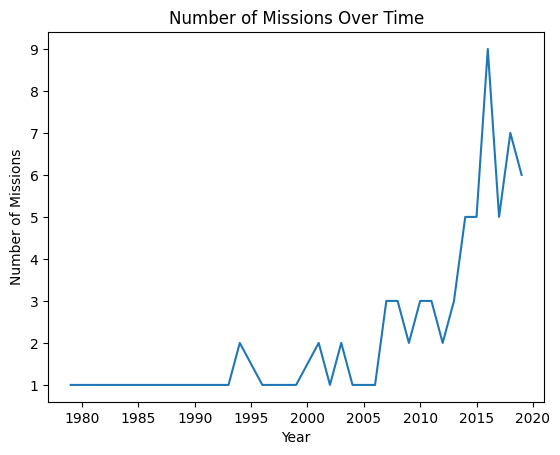

In [24]:
missions_over_time = df.groupby(df['Launch Date'].dt.year)['SN'].count()
plt.plot(missions_over_time.index, missions_over_time.values)
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.title('Number of Missions Over Time')
plt.show()

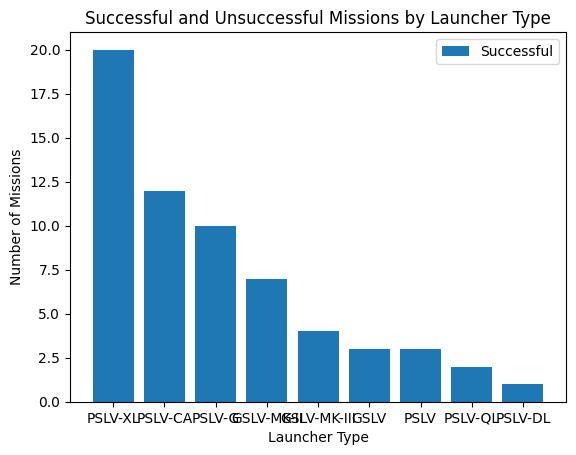

In [26]:
success_counts = df[df['Remarks'] != 'Mission Unsuccessful']['Launcher Type'].value_counts()
unsuccess_counts = df[df['Remarks'] == 'Mission Unsuccessful']['Launcher Type'].value_counts()

plt.bar(success_counts.index, success_counts.values, label='Successful')
#plt.bar(unsuccess_counts.index, unsuccess_counts.values, bottom=success_counts.values, label='Unsuccessful')
plt.xlabel('Launcher Type')
plt.ylabel('Number of Missions')
plt.title('Successful and Unsuccessful Missions by Launcher Type')
plt.legend()
plt.show()